### 基于分类算法的用户购买行为分析
#### 构建变量类似于如下变量

账户 ID|商品 ID|商品差评率|商品点评数|商品浏览次数|商品添加购物车次数|商品从购物车删除次数|商品点击次数|同类别商品被浏览次数|同类别商品被点击次数|用户第一次浏览该类商品时间距今（分钟）|label|
-|-|-|-|-|-|-|-|-|-|-|-
userid|123|0.8|200|12|23|23|1|1|0|1|1

筛选出全部的已经购买的用户和商品，统计分析


读取全部的用户行为的数据

In [10]:
import pandas as pd 
#读取数据
def read_data(address):
    reader = pd.read_csv(address, sep = ',', iterator = True,parse_dates=True)
    chunks = []
    loop = True
    i = 1
    while loop:
        try:
            chunk = reader.get_chunk(30000000)
            chunks.append(chunk)
            print (i)
            i += 1
        except StopIteration:
            loop = False
            print ('Iteration is stopped.')
    data = pd.concat(chunks, ignore_index = True)
    print("DONE")
    return data 

In [11]:
address02="~/Desktop/dataAnalysis/JDATA/JData/JData_Action_201602.csv"
address03="~/Desktop/dataAnalysis/JDATA/JData/JData_Action_201603.csv"
address04="~/Desktop/dataAnalysis/JDATA/JData/JData_Action_201604.csv"
df_02=read_data(address02)
df_03=read_data(address03)
df_04=read_data(address04)
df_action=pd.concat([df_02,df_03,df_04],axis=0,ignore_index=True)
print(df_action.shape)
df_action.head()

1
Iteration is stopped.
DONE
1
Iteration is stopped.
DONE
1
Iteration is stopped.
DONE
(50601736, 7)


,user_id,sku_id,time,model_id,type,cate,brand
0,266079.0,138778,2016-01-31 23:59:02,NaN,1,8,403
1,266079.0,138778,2016-01-31 23:59:03,0.0,6,8,403
2,200719.0,61226,2016-01-31 23:59:07,NaN,1,8,30
3,200719.0,61226,2016-01-31 23:59:08,0.0,6,8,30
4,263587.0,72348,2016-01-31 23:59:08,NaN,1,5,159


过滤得到全部的已经购买的用户及其对应的商品

In [18]:
df_test=df_action.ix[df_action["time"]<"2016-02-01",:]
df_test
df_action.describe()

,user_id,sku_id,model_id,type,cate,brand
count,5.060174e+07,5.060174e+07,2.994584e+07,5.060174e+07,5.060174e+07,5.060174e+07
mean,2.512444e+05,8.340089e+04,9.247641e+01,4.059689e+00,6.548271e+00,4.327459e+02
std,3.002979e+04,4.966677e+04,1.024518e+02,2.417952e+00,1.780178e+00,2.421404e+02
min,2.000010e+05,2.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00
25%,2.254920e+05,4.033600e+04,0.000000e+00,1.000000e+00,5.000000e+00,2.140000e+02
50%,2.497030e+05,7.961600e+04,2.600000e+01,6.000000e+00,7.000000e+00,4.740000e+02
75%,2.771030e+05,1.267910e+05,2.160000e+02,6.000000e+00,8.000000e+00,6.230000e+02
max,3.053210e+05,1.712250e+05,3.480000e+02,6.000000e+00,1.100000e+01,9.230000e+02


In [21]:
df_action["time"].min()

'2016-01-31 23:59:02'

In [20]:
df_action["time"].max()

'2016-04-15 23:59:59'

In [5]:
df_buy=df_action.ix[df_action["type"]==4,:]
print (df_buy.shape)
df_buy.head()

(48252, 7)


,user_id,sku_id,time,model_id,type,cate,brand
351,269365.0,166345,2016-02-01 00:01:00,NaN,4,9,306
649,235443.0,36692,2016-02-01 00:02:00,NaN,4,4,174
980,247689.0,9112,2016-02-01 00:03:00,NaN,4,5,78
1719,273959.0,102034,2016-02-01 00:05:00,NaN,4,5,78
2153,226791.0,163550,2016-02-01 00:06:00,NaN,4,4,306


In [1]:
# df_buy.groupby(["user_id","sku_id"]).count()

In [23]:
df_action.head()

,user_id,sku_id,time,model_id,type,cate,brand
0,266079.0,138778,2016-01-31 23:59:02,NaN,1,8,403
1,266079.0,138778,2016-01-31 23:59:03,0.0,6,8,403
2,200719.0,61226,2016-01-31 23:59:07,NaN,1,8,30
3,200719.0,61226,2016-01-31 23:59:08,0.0,6,8,30
4,263587.0,72348,2016-01-31 23:59:08,NaN,1,5,159


In [24]:
df_type=pd.get_dummies(df_action.ix[:,"type"])
# 1 浏览 2 添加购物车 3 从购物车删除 4 下单 5 关注 6 点击
# 修改数据
df_type.columns=["view","add","delet","label","fellow","click"]

In [25]:
df_type.head()

,view,add,delet,label,fellow,click
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,1,0,0,0,0,0


In [26]:
df_action_new=pd.concat([df_action[["user_id","sku_id","time","model_id","cate","brand"]],df_type],axis=1)

In [27]:
df_action_new.shape #检查合并后的数据规模

(50601736, 12)

In [28]:
df_action_new.head()#新版的行为数据

,user_id,sku_id,time,model_id,cate,brand,view,add,delet,label,fellow,click
0,266079.0,138778,2016-01-31 23:59:02,NaN,8,403,1,0,0,0,0,0
1,266079.0,138778,2016-01-31 23:59:03,0.0,8,403,0,0,0,0,0,1
2,200719.0,61226,2016-01-31 23:59:07,NaN,8,30,1,0,0,0,0,0
3,200719.0,61226,2016-01-31 23:59:08,0.0,8,30,0,0,0,0,0,1
4,263587.0,72348,2016-01-31 23:59:08,NaN,5,159,1,0,0,0,0,0


In [42]:
df_action_left=df_action_new.groupby(["user_id","sku_id"])["view","add","delet","fellow","click"].sum().reset_index()

In [44]:
df_action_right=df_action_new[["user_id","sku_id","label"]].groupby(["user_id","sku_id"]).sum().reset_index()
df_action_right.head()

,user_id,sku_id,label
0,200001.0,2222,0
1,200001.0,4345,0
2,200001.0,5757,0
3,200001.0,10768,0
4,200001.0,14398,0


In [31]:
df_action_left.head()

,user_id,sku_id,view,add,delet,fellow,click
0,200001.0,2222,2.0,0.0,0.0,0.0,5.0
1,200001.0,4345,4.0,0.0,0.0,0.0,10.0
2,200001.0,5757,4.0,0.0,1.0,0.0,5.0
3,200001.0,10768,2.0,0.0,0.0,0.0,4.0
4,200001.0,14398,2.0,0.0,0.0,0.0,4.0


In [32]:
#检查数据数目
print(df_action_left.shape,df_action_right.shape)

(3864885, 7) (3864885, 3)


In [48]:
#合并行为和目标

df_action_new=pd.merge(df_action_left,df_action_right,how="inner",on=["user_id","sku_id"])
print(df_action_new.shape)
# df_action_new=pd.merge(df_action_new,df_action[["user_id","sku_id","time"]],how="left",on=["user_id","sku_id"])
print(df_action_new.shape)
df_action_new.head()

(3864885, 8)
(3864885, 8)


,user_id,sku_id,view,add,delet,fellow,click,label
0,200001.0,2222,2.0,0.0,0.0,0.0,5.0,0
1,200001.0,4345,4.0,0.0,0.0,0.0,10.0,0
2,200001.0,5757,4.0,0.0,1.0,0.0,5.0,0
3,200001.0,10768,2.0,0.0,0.0,0.0,4.0,0
4,200001.0,14398,2.0,0.0,0.0,0.0,4.0,0


In [34]:
# 读入评论数据
address="~/Desktop/dataAnalysis/JDATA/JData/JData_Comment.csv"
df_comment=read_data(address)
# 读入产品数据
address="~/Desktop/dataAnalysis/JDATA/JData/JData_Product.csv"
df_product=read_data(address)
#读入用户数据 
# 用户数据需要单独处理
# address="~/Desktop/dataAnalysis/JDATA/JData/JData_User.csv"
# df_user=read_data(address)

1
Iteration is stopped.
DONE
1
Iteration is stopped.
DONE


In [35]:
df_comment.head()

,dt,sku_id,comment_num,has_bad_comment,bad_comment_rate
0,2016-02-01,1000,3,1,0.0417
1,2016-02-01,10000,2,0,0.0000
2,2016-02-01,100011,4,1,0.0376
3,2016-02-01,100018,3,0,0.0000
4,2016-02-01,100020,3,0,0.0000


In [36]:
df_product.head()

,sku_id,a1,a2,a3,cate,brand
0,10,3,1,1,8,489
1,100002,3,2,2,8,489
2,100003,1,-1,-1,8,30
3,100006,1,2,1,8,545
4,10001,-1,1,2,8,244


In [37]:
# 合并评论数据和行为数据

df_new=pd.merge(df_action_new,df_comment,how="inner",on=["sku_id"])
print(df_new.shape)
df_new.head()

(44259132, 12)


,user_id,sku_id,view,add,delet,fellow,click,label,dt,comment_num,has_bad_comment,bad_comment_rate
0,200001.0,2222,2.0,0.0,0.0,0.0,5.0,0,2016-02-01,4,1,0.1519
1,200001.0,2222,2.0,0.0,0.0,0.0,5.0,0,2016-02-08,4,1,0.1481
2,200001.0,2222,2.0,0.0,0.0,0.0,5.0,0,2016-02-15,4,1,0.1463
3,200001.0,2222,2.0,0.0,0.0,0.0,5.0,0,2016-02-22,4,1,0.1591
4,200001.0,2222,2.0,0.0,0.0,0.0,5.0,0,2016-02-29,4,1,0.1489


In [38]:
# 合并产品数据和前面的数据
df_new=pd.merge(df_new,df_product,how="inner",on=["sku_id"])
print(df_new.shape)
df_new.head()

(16823880, 17)


,user_id,sku_id,view,add,delet,fellow,click,label,dt,comment_num,has_bad_comment,bad_comment_rate,a1,a2,a3,cate,brand
0,200001.0,14398,2.0,0.0,0.0,0.0,4.0,0,2016-02-01,3,1,0.0769,1,1,2,8,403
1,200001.0,14398,2.0,0.0,0.0,0.0,4.0,0,2016-02-08,3,1,0.0714,1,1,2,8,403
2,200001.0,14398,2.0,0.0,0.0,0.0,4.0,0,2016-02-15,3,1,0.0714,1,1,2,8,403
3,200001.0,14398,2.0,0.0,0.0,0.0,4.0,0,2016-02-22,3,1,0.0714,1,1,2,8,403
4,200001.0,14398,2.0,0.0,0.0,0.0,4.0,0,2016-02-29,3,1,0.0714,1,1,2,8,403


In [95]:
# 对上面的数据做统计性描述
df_new.describe()

,user_id,sku_id,view,add,delet,fellow,click,label,comment_num,has_bad_comment,bad_comment_rate,a1,a2,a3,cate,brand
count,1.682388e+07,1.682388e+07,1.682388e+07,1.682388e+07,1.682388e+07,1.682388e+07,1.682388e+07,1.682388e+07,1.682388e+07,1.682388e+07,1.682388e+07,1.682388e+07,1.682388e+07,1.682388e+07,16823880.0,1.682388e+07
mean,2.522283e+05,8.448313e+04,1.263724e+01,1.263724e+01,1.263724e+01,1.263724e+01,1.263724e+01,9.461551e-03,3.585929e+00,8.270477e-01,2.846799e-02,2.054328e+00,1.188664e+00,1.340719e+00,8.0,4.282972e+02
std,3.025924e+04,5.054004e+04,2.296083e+01,2.296083e+01,2.296083e+01,2.296083e+01,2.296083e+01,9.747741e-02,9.360715e-01,3.782061e-01,4.288993e-02,1.047888e+00,5.840411e-01,8.316541e-01,0.0,2.275716e+02
min,2.000010e+05,1.800000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,8.0,3.000000e+01
25%,2.261690e+05,4.033600e+04,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,1.620000e-02,1.000000e+00,1.000000e+00,1.000000e+00,8.0,2.140000e+02
50%,2.517655e+05,7.952000e+04,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,2.380000e-02,3.000000e+00,1.000000e+00,1.000000e+00,8.0,4.890000e+02
75%,2.782710e+05,1.290100e+05,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,0.000000e+00,4.000000e+00,1.000000e+00,3.360000e-02,3.000000e+00,2.000000e+00,2.000000e+00,8.0,5.450000e+02
max,3.053210e+05,1.711820e+05,1.524000e+03,1.524000e+03,1.524000e+03,1.524000e+03,1.524000e+03,4.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,8.0,9.160000e+02


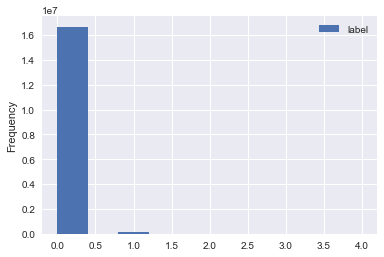

label
0    16665564
1      157644
2         516
3         120
4          36
Name: user_id, dtype: int64

In [39]:
# label 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
plt.figure()
df_new[["label"]].plot.hist()
plt.show()

df_new.groupby(["label"])["user_id"].count()

In [40]:
df_action_new.head()

,user_id,sku_id,view,add,delet,fellow,click,label
0,200001.0,2222,2.0,0.0,0.0,0.0,5.0,0
1,200001.0,4345,4.0,0.0,0.0,0.0,10.0,0
2,200001.0,5757,4.0,0.0,1.0,0.0,5.0,0
3,200001.0,10768,2.0,0.0,0.0,0.0,4.0,0
4,200001.0,14398,2.0,0.0,0.0,0.0,4.0,0
